In [ ]:
import sys  
sys.path.insert(0, 'routeelevation.py directory')

from routeelevation import RouteElevation

In [ ]:
# sample route dictionary with gpx file directory and stops coordinates 
route_dict = {'route_0': {'route_latlon':'route_0.gpx',
                          'stops_lat': [43.66579, 43.70447, 43.6657045, 43.7055234],
                          'stops_lon': [-79.31892, -79.31845, -79.321447 , -79.3224241]},
              'route_1': {'route_latlon':'route_1.gpx',
                          'stops_lat': [43.57918, 43.56363, 43.5797484, 43.5640825],
                          'stops_lon': [-79.65663, -79.60666, -79.6546047, -79.6084487]}}

# gpx files folder directory 
dir = 'GPX file directory'

# a list of all related info about the route's safety details. 
routes_info = {}

for route in route_dict:
  # instantiate the RouteElevation class with GPX file directory 
  route_elev = RouteElevation(gpx_file=dir)
  # retrive route's elevation and coordinates
  elev, route_lat, route_lon = route_elev.get_elevation()
  # create the x axis to which route's elevation is measured against
  distance_axis = route_elev.x_axis(route_lat, route_lon)
  # get angle values for each coordinate in the route.
  theta = route_elev.angle_profile(elev, route_lat, route_lon) 
  # check the safety of each stop in the route
  safety, indxs = route_elev.route_safety(distance_axis, theta, route_lat, route_lon, route_dict[route]['stops_lat'], route_dict[route]['stops_lon'])
  # assign all realted route's info in the routes_info dictionary
  routes_info[route] = {'elevation':elev,
                        'route latitude':route_lat,
                        'route longtitude':route_lon,
                        'distance axis':distance_axis,
                        'elevation angles':theta,
                        'stops safety':safety,
                        'stops indices':indxs}

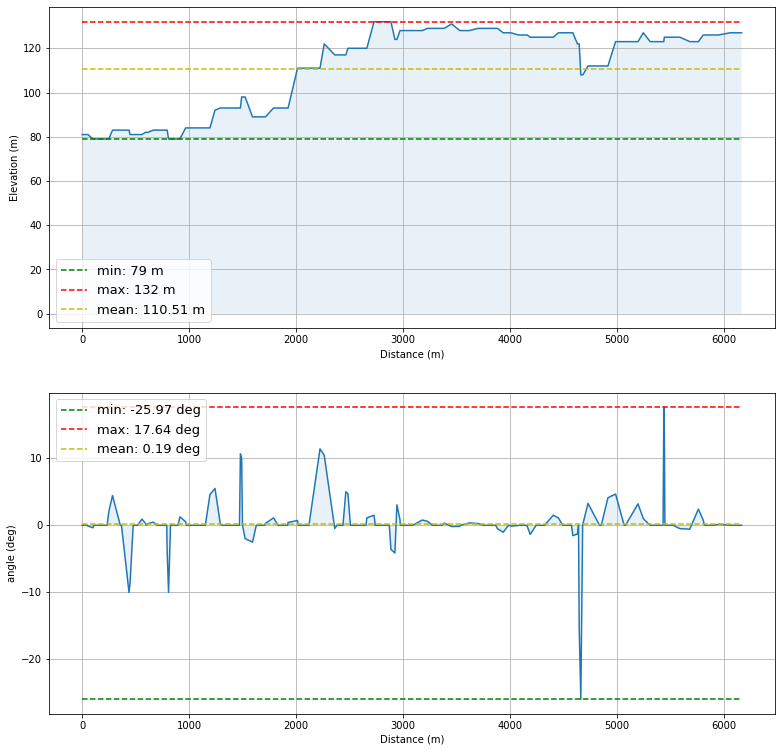

In [ ]:
# sample subplots for route_0
key = 'route_0'
x = routes_info[key]['distance axis']
e = routes_info[key]['elevation']
theta = routes_info[key]['elevation angles']
route_elev.plot_profiles(x, e, theta)

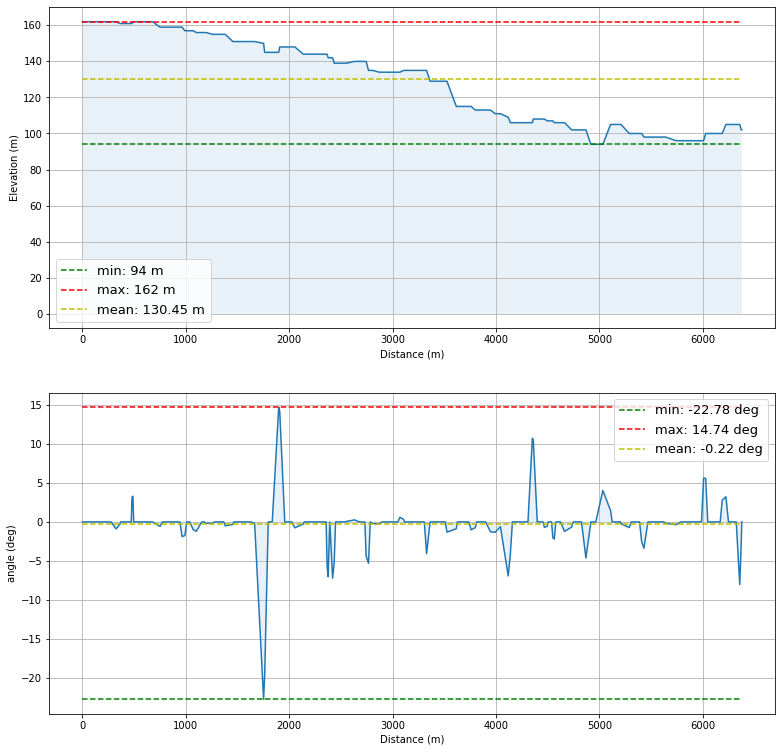

In [ ]:
# sample subplots for route_1
key = 'route_1'
x = routes_info[key]['distance axis']
e = routes_info[key]['elevation']
theta = routes_info[key]['elevation angles']
route_elev.plot_profiles(x, e, theta)

In [ ]:
# route_0 stops left, center and right indices list of lists
key = 'route_0'
x = routes_info[key]['distance axis']
indices = routes_info[key]['stops indices']
print('indices = ',indices,'\n')
print("location of stop 1 in meters in the route's path is at ", x[indices[1][1]],'\n') #from left to right: [1] for second stop number, [1] for center index
print("left coverage length in meters of stop 1 = ", x[indices[1][1]] - x[indices[1][0]],'\n') 
print("right coverage length in meters of stop 1 = ", x[indices[1][2]] - x[indices[1][1]],'\n') 
print("total coverage length in meters for stop 1 = ",x[indices[1][2]] - x[indices[1][0]])

indices =  [[0, 11, 27], [187, 216, 236], [0, 0, 18], [215, 236, 236]] 

location of stop 1 in meters in the route's path is at  5760.694992752196 

left coverage length in meters of stop 1 =  450.5784460474915 

right coverage length in meters of stop 1 =  404.42844071815034 

total coverage length in meters for stop 1 =  855.0068867656419
